In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import yfinance as yf

# Prompt the user to enter the stock symbol
ticker_symbol = input("Enter the stock symbol (e.g., TSLA for Tesla): ").upper()

# Define the date range for historical data
start_date = "2020-01-01"
end_date = "2023-12-31"

# Use yfinance to fetch the data
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Extract the 'Close' prices
close_prices = stock_data['Close'].values.astype(float)  # Use stock_data, not data

# Normalize the data
scaler = MinMaxScaler()
close_prices = scaler.fit_transform(close_prices.reshape(-1, 1))

# Create a DataFrame with closing prices and a shifted column for the target
data = pd.DataFrame({'Close': close_prices.ravel()})
data['Target'] = data['Close'].shift(-1)

# Drop NaN values in the DataFrame
data.dropna(inplace=True)

# Split the data into features (X) and target (y)
X = data[['Close']].values
y = data['Target'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Create a time index for the test data
time_index = stock_data.index[-len(X_test):]  # Corrected indexing

# Calculate Moving Averages
closing_prices = stock_data['Close']
ma_100 = closing_prices.rolling(window=100).mean()
ma_200 = closing_prices.rolling(window=200).mean()

# Display the data
print("Stock Price Data:")
print(data.tail())  # Display the last few rows of the data




Enter the stock symbol (e.g., TSLA for Tesla): AAPL
[*********************100%%**********************]  1 of 1 completed
Mean Squared Error: 0.0005833789504050547
Stock Price Data:
        Close    Target
939  0.825517  0.814616
940  0.814616  0.816469
941  0.816469  0.820174
942  0.820174  0.838270
943  0.838270  0.825731


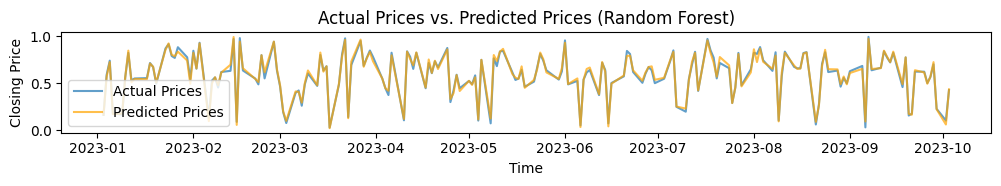

In [7]:
# Create multiple graphs

# Graph 1: Actual Price vs. Predicted Price
plt.figure(figsize=(12, 6))
plt.subplot(4, 1, 1)
plt.plot(time_index, y_test, label='Actual Prices', alpha=0.7)
plt.plot(time_index, y_pred, label='Predicted Prices', alpha=0.7, color='orange')
plt.title('Actual Prices vs. Predicted Prices (Random Forest)')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()


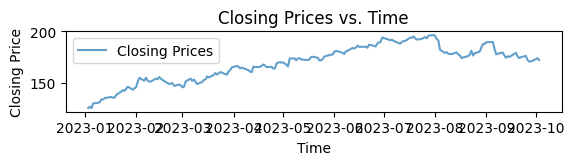

In [8]:
# Graph 2: Closing Price vs. Time
plt.subplot(4, 1, 2)
plt.plot(time_index, closing_prices[-len(X_test):], label='Closing Prices', alpha=0.7)  # Corrected indexing
plt.title('Closing Prices vs. Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()



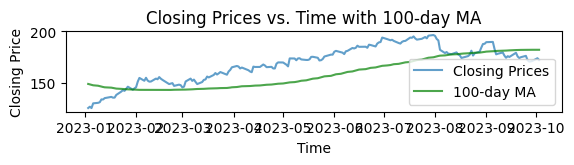

In [9]:
# Graph 3: Closing Price vs. Time with 100-day Moving Average
plt.subplot(4, 1, 3)
plt.plot(time_index, closing_prices[-len(X_test):], label='Closing Prices', alpha=0.7)  # Corrected indexing
plt.plot(time_index, ma_100[-len(X_test):], label='100-day MA', alpha=0.7, color='green')  # Corrected indexing
plt.title('Closing Prices vs. Time with 100-day MA')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()



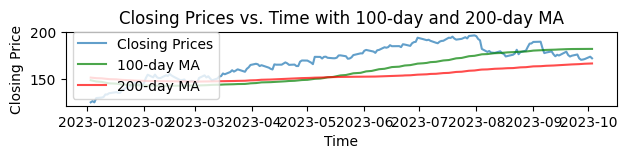

In [10]:
# Graph 4: Closing Price vs. Time with 100-day and 200-day Moving Averages
plt.subplot(4, 1, 4)
plt.plot(time_index, closing_prices[-len(X_test):], label='Closing Prices', alpha=0.7)  # Corrected indexing
plt.plot(time_index, ma_100[-len(X_test):], label='100-day MA', alpha=0.7, color='green')  # Corrected indexing
plt.plot(time_index, ma_200[-len(X_test):], label='200-day MA', alpha=0.7, color='red')  # Corrected indexing
plt.title('Closing Prices vs. Time with 100-day and 200-day MA')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.tight_layout()
plt.show()